# Notebook for creating max hail size distribution histograms

### Import necessary libraries

In [34]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.mlab as mlab
import statistics

### Import WRF HIST, mid- and end-FUTR RCP 4.5, 8.5 files (resampled to daily max 12Z-12Z)

In [35]:
hist = xr.open_dataset('/home/scratch/jgoodin/hist_daily_max_hail_inches.nc') #Open hist daily max .nc file saved to /home/scratch directory
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/mid_century_4p5_daily_max_hail_inches.nc') #Open mid-FUTR 4.5 daily max .nc file saved to /home/scratch directory
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/mid_century_8p5_daily_max_hail_inches.nc') #Open mid-FUTR 8.5 daily max .nc file saved to /home/scratch directory
end4p5 = xr.open_dataset('/home/scratch/jgoodin/end_century_4p5_daily_max_hail_inches.nc') #Open end-FUTR 4.5 daily max .nc file saved to /home/scratch directory
end8p5 = xr.open_dataset('/home/scratch/jgoodin/end_century_8p5_daily_max_hail_inches.nc') #Open end-FUTR 8.5 daily max .nc file saved to /home/scratch directory

In [36]:
hist #Test print one dataset- make sure daily data are returned

<xarray.Dataset>
Dimensions:     (Time: 5479, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-09-30T12:00:00 ... 2005-09-29T12:0...
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 ...

### Convert each file to units of in (provided by dataset in m)

In [37]:
hist = hist.HAIL_MAX2D * 39.3701
mid4p5 = mid4p5.HAIL_MAX2D * 39.3701
mid8p5 = mid8p5.HAIL_MAX2D * 39.3701 #Convert to in
end4p5 = end4p5.HAIL_MAX2D * 39.3701
end8p5 = end8p5.HAIL_MAX2D * 39.3701

## Convert HAIL_MAX2D data from each climate epoch to a 1D array (change variables to match climate epoch)

### NOTE: we want data to be 1D to plot a histogram. We only care about values of HAIL_MAX2D, not time dimension, lats, or lons

In [38]:
end8p5_1d = end8p5.values.ravel() #Use numpy's ravel method to return a contiguous flattened 1D array
len(hist_1d) #Check how many values are being returned by the 1D array- should be around 6,885,912,975 (899 x 1399 x 365 x 15)
#hist_trial_1d #Print out array of HAIL_MAX2D values

6889686078

## Remove all values from array ≠ 0

In [39]:
end8p5_nonzero = end8p5_1d[end8p5_1d != 0] #Select all values from climate epoch (change variables) that are ≠ 0 
#hist_trial_nonzero = hist_trial_1d.where(hist_trial_1d > 0, drop = True)
#hist_trial_nonzero = hist_trial_nonzero.dropna()
#min(hist_nonzero) #Print min of hist dataset to make sure no values of < 0.25 are returned

#### Do this for all epochs to check the length of 1D array comprised of HAIL_MAX2D < 0.25- make sure none are returned

In [8]:
end8p5_check = end8p5_nonzero[end8p5_nonzero <= 0.25] #Create array with values < 0.25
len(hist_check) #Check the length of above array

0

## Calculate relevant statistics from 1D array of each climate epoch- include this as table in document

In [11]:
min(hist_nonzero) #Print out min of array

0.25011042

In [ ]:
statistics.median(hist_nonzero) #Print out median of array

In [ ]:
statistics.mean(hist_nonzero) #Print out mean of array

In [23]:
max(hist_nonzero) #Print out max of array

In [ ]:
statistics.std(hist_nonzero) #Print out st dev of array

In [ ]:
np.percentile(hist_nonzero, 5) #Print out 5th percentile of array

In [ ]:
np.percentile(hist_nonzero, 95) #Print out 95th percentile of array

## Create a histogram of daily max HAIL_MAX2D values- how many times is each hail size bin occurring?

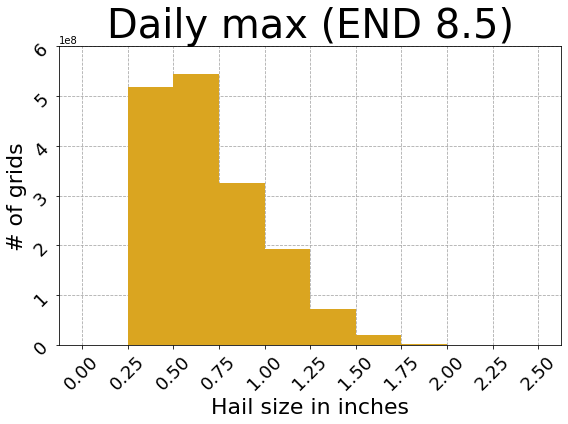

In [41]:
#num_bins = 10
#n, bins, patches = ax.hist(hist_max, num_bins, density=1)
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(end8p5_nonzero, bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5], facecolor='goldenrod', zorder = 10)
#(mu, sigma) = norm.fit(hist_max)
#best_fit_line = norm.pdf(bins, mu, sigma)
#plt.plot(bins, best_fit_line, 'k-', linewidth = 2, zorder = 20, color = 'k')
#plt.plot(hist_max, norm.pdf(hist_max, mean, 1), 'k-', linewidth = 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
ax.set_yticks([0, 1*(10**8), 2*(10**8), 3*(10**8), 4*(10**8), 5*(10**8), 6*(10**8)])
plt.grid(color = 'darkgray', linestyle = '--')
ax.set_title('Daily max (END 8.5)', fontsize = 40)
ax.set_xlabel('Hail size in inches', fontsize = 22)
ax.set_ylabel('# of grids', fontsize = 22)
plt.xticks(fontsize = 18, rotation = 45)
plt.yticks(fontsize = 18, rotation = 45)
plt.tight_layout()
plt.savefig('/home/scratch/jgoodin/end8p5_histogram.png')
plt.show()